김유연 week 5 미션 풀이
=============

#### Imports

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

#### Q1.

#### Hyperparameters

In [2]:
# Hyperparameter
H, W = 28, 28
channel = 3
input_size = H * W
num_classes = 10
learning_rate = 0.01
training_epochs = 15
batch_size = 100

root = '../data'


#### Load Data

In [3]:
# load data
mnist_train = dset.MNIST(root=root, train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dset.MNIST(root=root, train=False, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, drop_last=True)

#### Q2. 

#### Check Hardware

In [4]:
# check cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Build and Initialize Model

In [5]:
# build linear model
linear = nn.Linear(in_features=input_size, out_features=num_classes, bias=True).to(device)

# weight init
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[ 0.0855, -0.0972, -0.2768,  ...,  0.3174, -2.2124, -0.1031],
        [ 0.1477,  0.2501,  1.0751,  ...,  0.8069,  0.2230, -0.0515],
        [-2.1149,  0.1045,  0.7044,  ..., -0.4835, -0.3740,  0.4427],
        ...,
        [-0.8608, -1.0134, -0.4477,  ...,  0.3671, -1.7876,  1.1685],
        [-0.5446,  1.7157, -0.4325,  ...,  1.0610,  0.9307, -0.9435],
        [-0.5206,  0.5557,  0.9156,  ...,  0.3312,  1.0920, -0.0396]],
       device='cuda:0', requires_grad=True)

#### Q3. Loss and optimizer

In [6]:
# Loss fn - Cross Entropy Loss
criterion = torch.nn.CrossEntropyLoss().to(device)

# optimizer - SGD
optimizer = torch.optim.SGD(linear.parameters(), lr = learning_rate)

#### Q4. Train

In [7]:
loss_list = []
accuracy_list = []

In [8]:
for epoch in range(training_epochs):
    
    temp_loss_list = []
    temp_accuracy_list = []

    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        imgs = imgs.view(-1, 28 * 28)

        outputs = linear(imgs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad() # optimizer zero grad
        loss.backward() # loss backward
        optimizer.step() # optimizer step

        _, argmax = torch.max(outputs, 1)
        accuracy = (labels == argmax).float().mean()
        
        temp_loss_list.append(loss.item())
        temp_accuracy_list.append(accuracy.item())

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
                epoch+1, training_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))

    loss_list.append(sum(temp_loss_list)/len(temp_loss_list))
    accuracy_list.append(sum(temp_accuracy_list)/len(temp_accuracy_list))

Epoch [1/15], Step [100/600], Loss: 8.4558, Accuracy: 7.00%
Epoch [1/15], Step [200/600], Loss: 8.3550, Accuracy: 18.00%
Epoch [1/15], Step [300/600], Loss: 6.2916, Accuracy: 25.00%
Epoch [1/15], Step [400/600], Loss: 6.3787, Accuracy: 24.00%
Epoch [1/15], Step [500/600], Loss: 5.7844, Accuracy: 34.00%
Epoch [1/15], Step [600/600], Loss: 4.8565, Accuracy: 27.00%
Epoch [2/15], Step [100/600], Loss: 4.2074, Accuracy: 44.00%
Epoch [2/15], Step [200/600], Loss: 4.1450, Accuracy: 36.00%
Epoch [2/15], Step [300/600], Loss: 3.2378, Accuracy: 49.00%
Epoch [2/15], Step [400/600], Loss: 4.2292, Accuracy: 44.00%
Epoch [2/15], Step [500/600], Loss: 2.9246, Accuracy: 55.00%
Epoch [2/15], Step [600/600], Loss: 3.8639, Accuracy: 45.00%
Epoch [3/15], Step [100/600], Loss: 2.7340, Accuracy: 49.00%
Epoch [3/15], Step [200/600], Loss: 2.4827, Accuracy: 57.00%
Epoch [3/15], Step [300/600], Loss: 3.4570, Accuracy: 49.00%
Epoch [3/15], Step [400/600], Loss: 2.5950, Accuracy: 51.00%
Epoch [3/15], Step [500/6

#### Q5. Test

In [9]:
linear.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        imgs = imgs.view(-1, 28 * 28)

        outputs = linear(imgs)
        _, argmax = torch.max(outputs, 1) # max()를 통해 최종 출력이 가장 높은 class 선택
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()

    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))

Test accuracy for 10000 images: 79.94%


#### Train Visualize

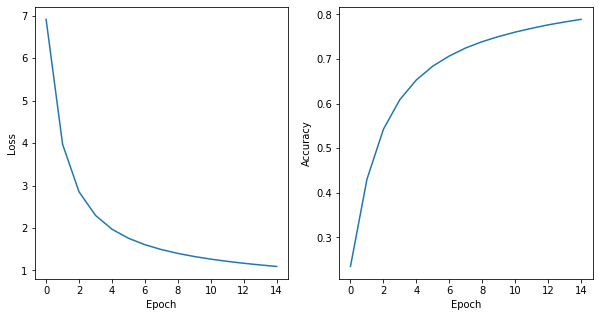

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss_list)

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(accuracy_list)

plt.show()